1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo
 - Percentiles 25, 75
 - Rango Intercualtílico
 - Boxplot de algunas variables
 - Tabla de frecuencias
 - Variables cualitativas
 - Variables cuantitativas
 - Frecuencia acumulada
 - Representación de al menos una tabla de frecuencias

In [56]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('../DATA/ds_salaries.csv')

In [21]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
df.describe() # variables cuantitativas + media de salary_in_usd, minimo y maximo

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
df.describe(include=object) # variables cualitativas

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


In [7]:
# Trabajamos sobre la variable salary_in_usd

In [22]:
df['salary_in_usd'].describe() # de aquí sacamos la mean, min, max y percentiles (25%, 75%)

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [9]:
mediana = df['salary_in_usd'].median()
mediana

101570.0

In [10]:
moda = df['salary_in_usd'].mode()
moda

0    100000
dtype: int64

Con estos primeros datos obtenidos podemos ver que la media de salario se concentra en 112297.86, mientras que la mediana está en 101570.0. Esto nos dice ya de entrada que nuestros datos tienen cierta dispersión con respecto a la media y esto podrá ser consecuencia de datos outliers que veremos en la gráfica de cajas. Además, el salario más común es de 100000 dólares, el mínimo es de 2859 (será un becario o un error de typing) y el máximo de 600000.

In [11]:
# Rango Intercualtílico
q3, q1 = np.percentile(df['salary_in_usd'], [75,25])
iqr = q3 - q1
iqr

87274.0

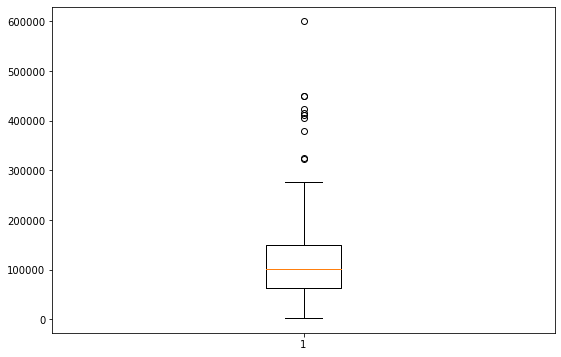

In [12]:
# Boxplot de salary_in_usd 
a = df['salary_in_usd']

fig = plt.figure(1,figsize=(9,6))
ax = fig.add_subplot(1,1,1)

bp = ax.boxplot([a])


Como sospechábamos antes, en este gráfico podemos ver a los outliers que continen nuestros datos, con salarios alejados de la media. Estos son los causantes de la variación de la media respecto de la mediana que veíamos en el apartado anterior.
Si nos centramos en la caja, vemos que el 50% de nuestros datos están concentrados por debajo de la mediana, 101570.0 y el 75% de nuestros datos, por debajo de 150000. De esta forma, los demás datos hasta los 600000 que veíamos en el máximo, representarán el 25% de nuestros datos.

In [52]:
df['work_year'].unique()

array([2020, 2021, 2022])

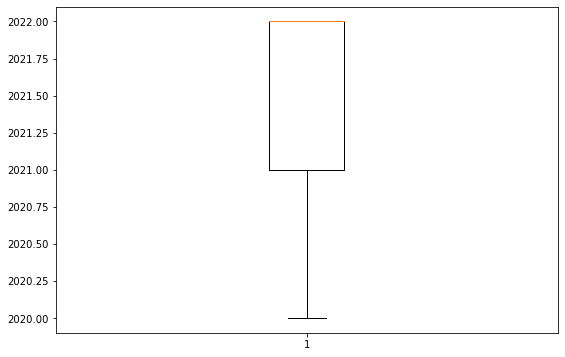

In [24]:
# boxplot para work_year
b = df['work_year']

fig = plt.figure(1,figsize=(9,6))
ax = fig.add_subplot(1,1,1)

bp = ax.boxplot([b])

Todos los datos contenidos en este estudio están centrados entre los años 2020 y 2022.

In [54]:
# frecuencia de salary_in_usd
frec_usd = df.groupby('salary_in_usd')
frec_usd.size()
df_salary = frec_usd.size().reset_index(name='frecuencia')
df_salary

,salary_in_usd,frecuencia
0,2859,1
1,4000,2
2,5409,1
3,5679,1
4,5707,1
...,...,...
364,412000,1
365,416000,1
366,423000,1
367,450000,2


Ahora queremos averiguar qué tamaño de empresa contenía más departamento de data (con sus distintas posiciones de trabajo).

In [28]:
#frecuencia de company_size
frec_size = df.groupby('company_size')
frec_size.size()
df_size = frec_size.size().reset_index(name='frecuencia')
df_size.head()

,company_size,frecuencia
0,L,198
1,M,326
2,S,83


Con los resultados obtenidos, vemos que aquellas empresas que contienen más personal de data son las de tamaño M, es decir, medianas.
Podemos ver su representación gráfica abajo

<AxesSubplot:>

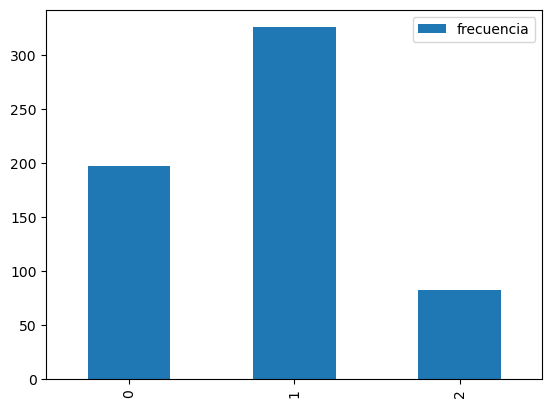

In [50]:
plt.rcdefaults()
df_size.plot.bar()

In [25]:
# Frecuencia acumulada de salary_in_usd
df_salary['grupo'] = pd.cut(df['salary_in_usd'], bins =10)

z = df_salary.groupby('grupo').agg(frecuencia=('salary_in_usd','count'))
z

,frecuencia
grupo,
"(2261.859, 62573.1]",111
"(62573.1, 122287.2]",139
"(122287.2, 182001.3]",79
"(182001.3, 241715.4]",25
"(241715.4, 301429.5]",8
"(301429.5, 361143.6]",1
"(361143.6, 420857.7]",2
"(420857.7, 480571.8]",3
"(480571.8, 540285.9]",0


<AxesSubplot:ylabel='Frequency'>

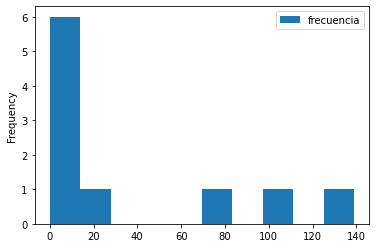

In [31]:
# Representación de al menos una tabla de frecuencias

z.plot.hist()

Aquí podemos ver la frecuencia de salarios ordenados por rangos.

2. Interpretación de los resultados.
 - Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

Comentado debajo de cada estudio, a lo largo del jupyter.